In [27]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import data.merge_data as md
import re
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data = md.get_data()

### Message length distribution

Now, let's see how messages are distributed by length (characters count)

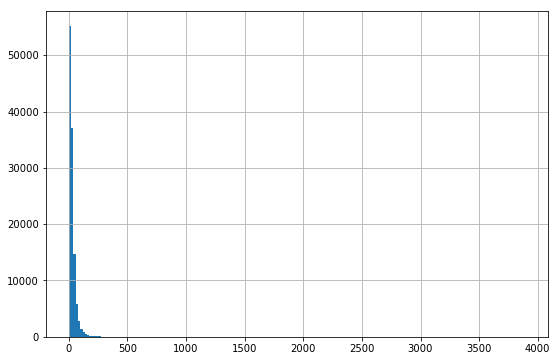

In [30]:
data['msg_len'] = data['body'].apply(lambda x: len(x))
data = data[data['msg_len'] > 0]
data['msg_len'].hist(bins=200, figsize=(9,6), grid=True)
plt.show()

And we have some Zipf-like distribution once again! Boring :) Notice how almost all the messages fall within the range of 0-200 charachters, and then there is virtually nothing. Actualy there are extremely rare occurences of very long messages and they don't let us really examine what happens in the major 0-200 range. So let's zoom in a little bit!

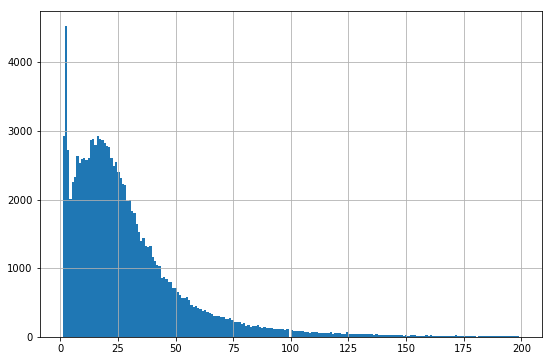

In [31]:
data['msg_len'].loc[data.msg_len < 200].hist(bins=200, figsize=(9,6), grid=True)
plt.show()

This time the number of bins = the number of ranks on the $x$ axis. And an interesting pattern emerges here. I'm not sure if it's going to repeat for other datasets, but in this case there is one peak in the very beginning for 2-char messages with 1-char being less likely, then there is a sudden drop followed by a new peak around 18 characters.

One possible way to explain these 2 peaks is as follows: the first one appears because 1-word messages are most frequent (I've shown it in the next figure below), but at the same time, there are not as many 1-char words that are used on their own as there are 2-char words (I'm considering English and Russian, which are the only 2 languages I'm familiar with). As for the second one, apparently when we are not talking about quick simple 1-2 word replies like "ok", "fine", "sure" or just a smiley face ":)", there has to be an average reasonable number of characters that is usually enough to express an average though.. And that's it!

It's a rather intuitive reasoning though (specifically about the 1st peak), so it may be just wrong :)

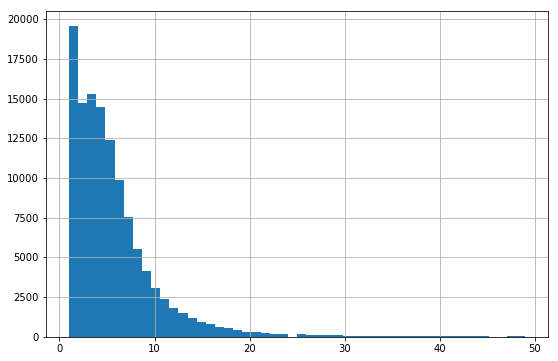

In [32]:
data['word_cnt'] = data['body'].apply(lambda x: len(x.split()))
data['word_cnt'].loc[data.word_cnt < 50].hist(bins=50, figsize=(9,6), grid=True)
plt.show()

As promised - message length distribution based on the number of words, as opposed to the number of characters. We can also output the mean, std.dev and the max of both 'lenght' columns:

In [33]:
data['msg_len'].mean(), data['msg_len'].std(), data['msg_len'].max()

(30.16749391075808, 37.87050432405039, 3895)

In [34]:
data['word_cnt'].mean(), data['word_cnt'].std(), data['word_cnt'].max()

(5.53347618290325, 6.096113663471925, 351)

### Time plots

In this section we'll see how different features change against time

#### Average messages count

In [7]:
data = data.sort_values(by='date').set_index('date') #.loc[data['source'] == 'wa']

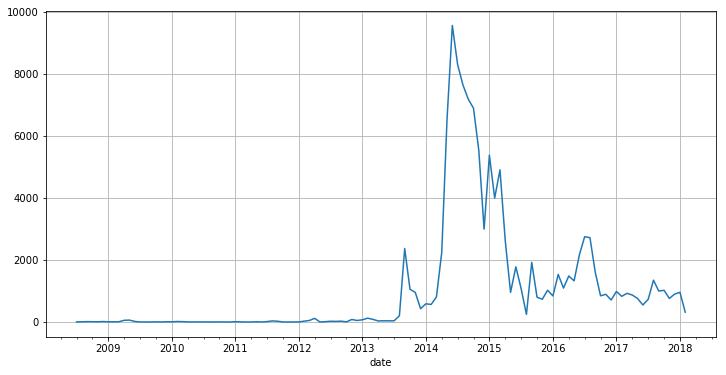

In [11]:
# make a fake column to count messages in a time window
data['msg'] = pd.Series(1, index=data.index)
data['msg'].resample('1M').sum().fillna(0).plot(figsize=(12,6), grid=True)
plt.show()

Apparently there is a huge difference before and after mid 2013, probably because I was primarily using other messengers in the past. Anyway, substituting your own data, you can find out how extensively have you been chatting in the Internet at different periods of your life.

#### Average message length

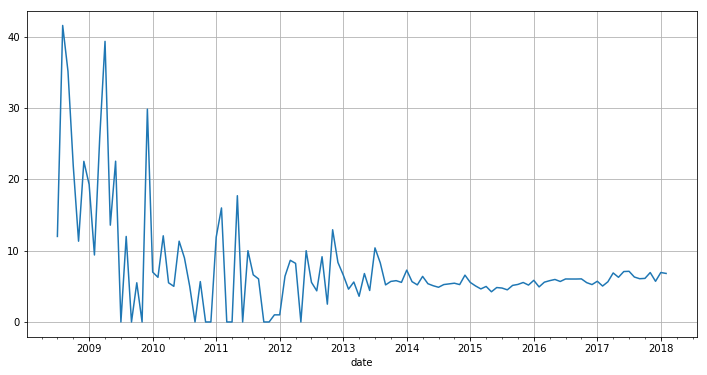

In [12]:
data['word_cnt'].resample('1M').mean().fillna(0).plot(figsize=(12,6), grid=True)
plt.show()

It may look like the average message length have decreased over time. But once again, because I had very few messages before mid 2013, the curve is really unstable for this time period. Other than that, the average value is expectedly constant.

#### Messages count by daytime (0 - 23 hour)

Here I show the histogram of messages sent at a specific hour of the day. Time is in 24-hour format, so if you're used to AM/PM system, just consider 0-11 as AM time, and 12-23 as PM time.

In [13]:
from datetime import datetime
import numpy as np

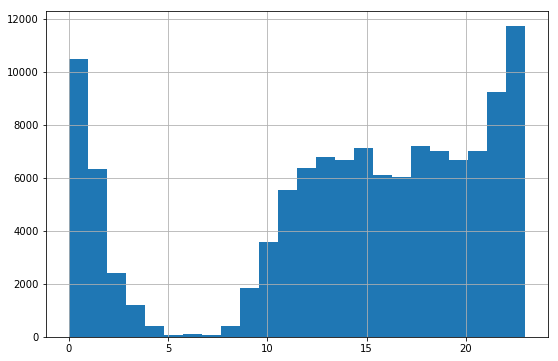

In [14]:
# add 'hour' column to group messages by
data['hour'] = data.index.to_series().apply(lambda x: datetime.time(x).hour)
data['hour'].hist(bins=24, figsize=(9,6), grid=True)
plt.show()

The highest activity around midnight reveals a typical nigh owl :)

#### Messages count by weekday (0 is Monday, 6 is Sunday)

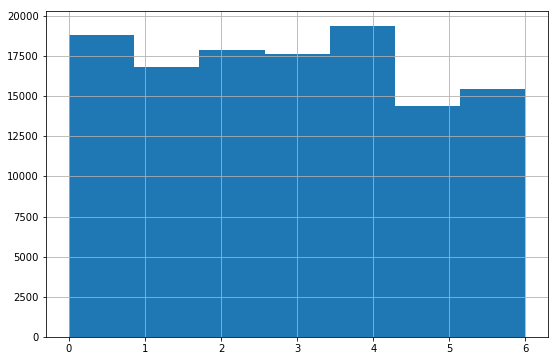

In [15]:
data['weekday'] = data.index.to_series().apply(lambda x: datetime.date(x).weekday())
data['weekday'].hist(bins=7, figsize=(9,6), grid=True)
plt.show()

Looks like I chat slightly less on weekends compared to other days, although I've expected to see the opposite. Other than that, nothing of particular interest here.

Go ahead and play around with your own data. Maybe you can find interesting patterns and insights for yourself!